<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>

### 9. 2D self-avoiding walks (SAWs)
Write a computer program for the exact enumeration of all self-avoiding
random walks (SAWs) with up to $N = 20$ steps on a two-dimensional
(2D) square lattice. In a relatively simple implementation one may
simply work with N nested “do loops”. On a “normal” PC the counting
of all possible SAWs with up to $N = 20$ steps should not take longer
than about 30 seconds.

Use this exact method to determine the number $Z$ of SAWs and their
mean squared end-to-end distance $\langle R^2_{ee} \rangle$ from the starting point (chosen
to be the origin $(0,0)$) in dependence of $N$. Plot $\ln \sqrt{\langle R^2_{ee} \rangle}$ against $\ln N$
and verify the scaling law $\sqrt{\langle R^2_{ee} \rangle} \propto N^\nu$ with $\nu = 3\,/\,4$ in 2D. Similarly
also the scaling law for $Z$ can be tested.

Much more extensive data up to $N = 59$ for $\langle R^2_{ee} \rangle$ (and also the mean
squared radius of gyration $\langle R^2_{\mathrm{gyr}} \rangle$) respectively up to $N = 71$ for $Z$
can be found for example in a paper of Iwan Jensen, *Enumeration of self-avoiding walks on the square lattice* , J. Phys. A: Math. Gen. 37
(2004) 5503–5524.

Full code available at https://github.com/till-robert/cs1_seminar

In [49]:
!./task9


N = 1
Z = 4            
<R_ee^2> = 1

N = 2
Z = 12            
<R_ee^2> = 2.66667

N = 3
Z = 36            
<R_ee^2> = 4.55556

N = 4
Z = 100            
<R_ee^2> = 7.04

N = 5
Z = 284            
<R_ee^2> = 9.56338

N = 6
Z = 780            
<R_ee^2> = 12.5744

N = 7
Z = 2172            
<R_ee^2> = 15.5562

N = 8
Z = 5916            
<R_ee^2> = 19.0128

N = 9
Z = 16268            
<R_ee^2> = 22.4114

N = 10
Z = 44100            
<R_ee^2> = 26.2425

N = 11
Z = 120292            
<R_ee^2> = 30.0177

N = 12
Z = 324932            
<R_ee^2> = 34.187

N = 13
Z = 881500            
<R_ee^2> = 38.3043

N = 14
Z = 2374444            
<R_ee^2> = 42.7864

N = 15
Z = 6416596            
<R_ee^2> = 47.2177

N = 16
Z = 17245332            
<R_ee^2> = 51.9925

N = 17
Z = 46466676            
<R_ee^2> = 56.7164

N = 18
Z = 124658732            
<R_ee^2> = 61.7665

N = 19
Z = 335116620            
<R_ee^2> = 66.7658

N = 20
Z = 897697164            
<R_ee^2> = 72.0765


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [31]:
def fit_powerlaw(x,a):
    return x**a
def fit_exp(x, b):
    return np.exp(b*x)

In [32]:
N, Z, R_ee_sq = np.loadtxt("out/saw_final.txt").T
R_ee = np.sqrt(R_ee_sq)

In [45]:
(a,),cov = curve_fit(fit_powerlaw,N,R_ee,p0=(3/4))
(b,),cov = curve_fit(fit_exp,N,Z,p0=(1.1))

print(f"ν = {a:.3f}, b = {b:.3f}")

ν = 0.712, b = 1.031


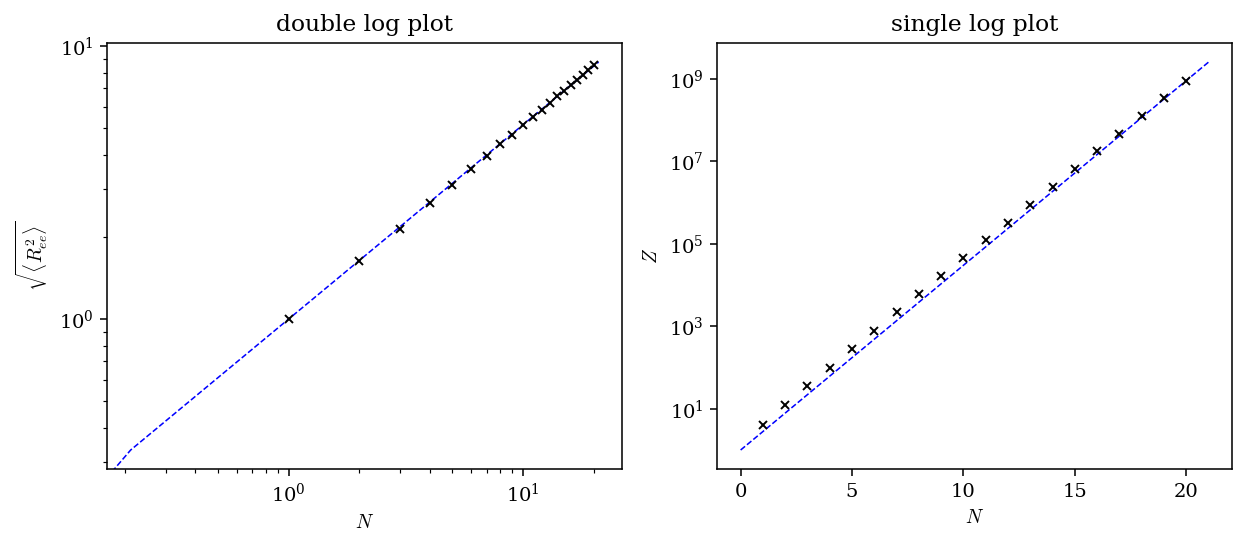

In [53]:
N_space = np.linspace(0,21,100)

plt.figure(figsize=(9, 4))
#1st subplot
plt.subplot(1,2,1)
#set scales,labels
plt.title("double log plot")
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$\sqrt{\langle R^2_{ee} \rangle}$")
plt.xlabel(r"$N$")

plt.plot(N_space,fit_powerlaw(N_space,a),"b--",lw=0.8)
plt.plot(N, R_ee, "kx", ms=4)

#2nd subplot
plt.subplot(1,2,2)
#set scales,labels
plt.title("single log plot")
plt.yscale("log")
#plt.xscale("log")
plt.ylabel(r"$Z$")
plt.xlabel(r"$N$")

plt.plot(N_space,fit_exp(N_space,b),"b--",lw=0.8)
plt.plot(N,Z,"kx", ms=4)

plt.show()